In [2]:
from sys import argv
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import sqlite3
import warnings
warnings.simplefilter("ignore")

## NASDAQ

In [3]:
ndx = yf.download('^IXIC', start = "2000-01-01", end = "2022-11-24")

[*********************100%***********************]  1 of 1 completed


In [4]:
ndx.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000
2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000
2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000
2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000
2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000


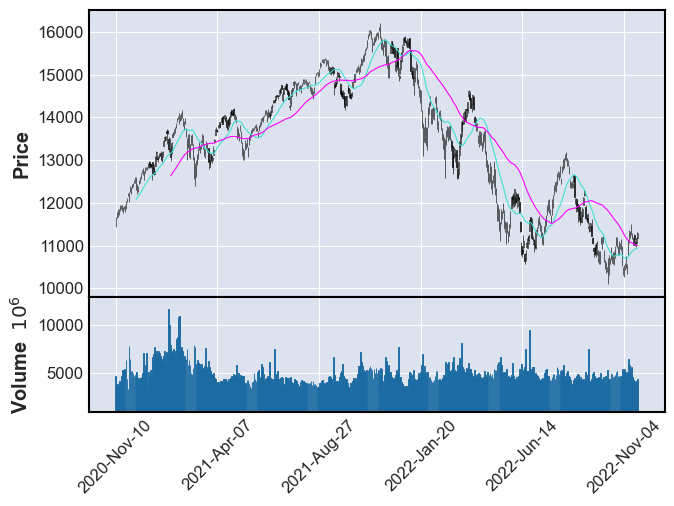

In [106]:
mpf.plot(ndx, type = 'candle', mav=(21, 55), volume = True)

[*********************100%***********************]  1 of 1 completed


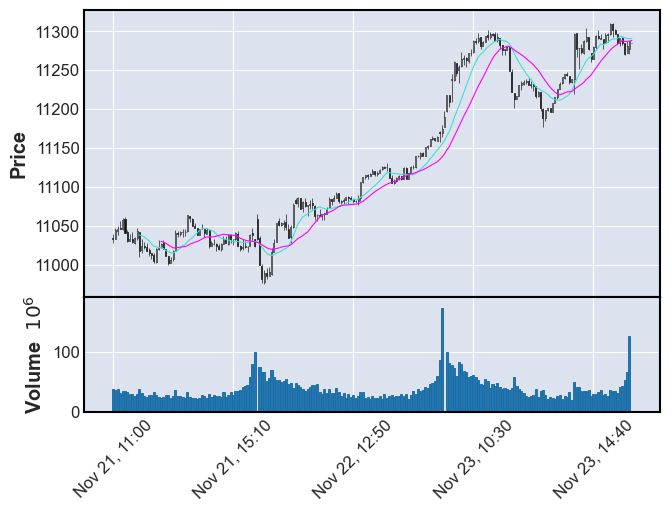

In [112]:
intraday_ndx = yf.download(tickers= '^IXIC', period = "5d", interval = "5m")
iday = intraday_ndx.loc["2022-11-21 11:00":"2022-11-24 12:00", :]
mpf.plot(iday, type="candle", mav=(12, 21), volume = True)

## SP 500

In [5]:
spx = yf.download('^GSPC', start = "2000-01-01", end = "2022-11-24")

[*********************100%***********************]  1 of 1 completed


In [6]:
spx.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


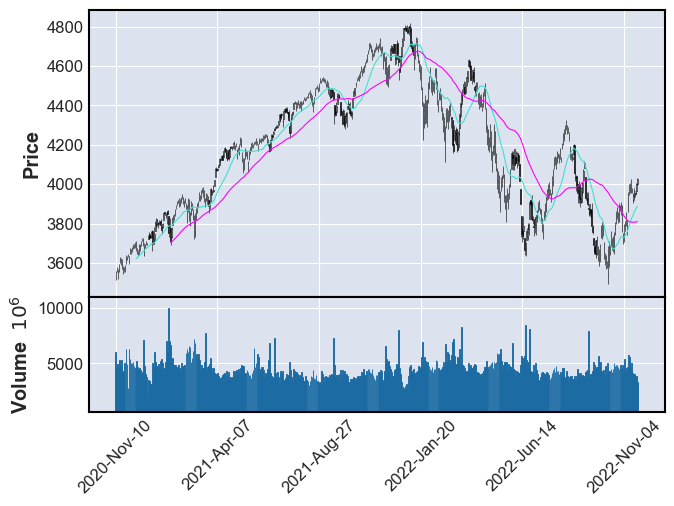

In [115]:
mpf.plot(spx, type = 'candle', mav=(21,55), volume = True, style = 'default')

[*********************100%***********************]  1 of 1 completed


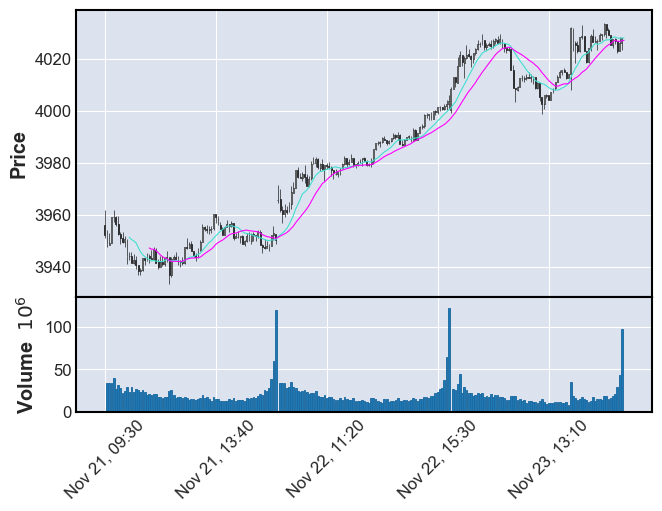

In [111]:
intraday_spx = yf.download(tickers= '^GSPC', period = "5d", interval = "5m")
iday_spx = intraday_spx.loc["2022-11-20 11:00":"2022-11-24 12:00", :]
mpf.plot(iday_spx, type="candle", mav=(12, 21), volume = True)

## GOLD

In [11]:
gold = yf.download('GC=F', start = "2000-01-01", end = "2022-11-24")

[*********************100%***********************]  1 of 1 completed


In [12]:
gold.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


[*********************100%***********************]  1 of 1 completed


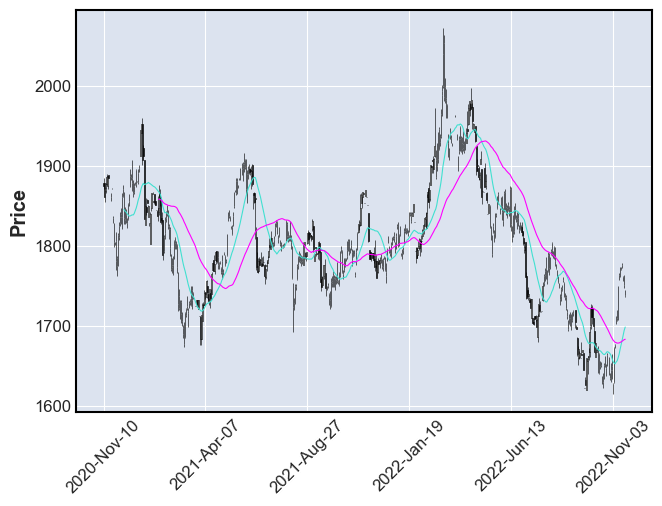

In [125]:
mpf.plot(gold, type = 'candle', mav=(21,55), style = 'default')

[*********************100%***********************]  1 of 1 completed


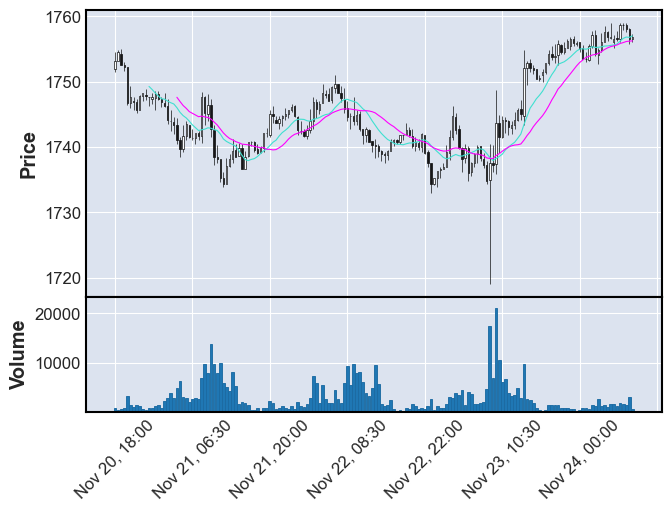

In [128]:
intraday_gold = yf.download(tickers= 'GC=F', period = "5d", interval = "30m")
iday_gold = intraday_gold.loc["2022-11-20 11:00":"2022-11-24 12:00", :]
mpf.plot(iday_gold, type="candle", mav=(12, 21), volume = True)

In [2]:
#con = sqlite3.connect("market_data.sqlite")

In [3]:
#This uses yfinance, moves the date to a column, renames the columns, and adds the symbol.
#def get_stock_data(symbol, start, end):
    #data = yf.download(symbol, start= start, end= end)
    #data.reset_index(inplace = True)
    #data.rename(columns = {"Date":"date", "Open": "open", "Low":"low", "Close":"close", "Adj Close": "adj_close", "Volume":"volume"}, inplace = True)
    #data["symbol"]=symbol
    #return data

In [4]:
#Create a function that uses `get_stock_data` to get a range of stock data and insert it into the market database.
#The function uses pandas to connect to the database and insert the data in the DataFrame into the database.
#Finally, get the last trading day's data.
#def save_data_range (symbol, start, end):
    #data = get_stock_data(symbol, start, end)
    #data.to_sql(
        #"stock_data",
        # con,
        # if_exists="append",
         #index=False)

In [5]:
#Create a function that inserts the last trading day into the database.
#This is useful for automating the script to get the current day's data.
#def save_last_trading_session (symbol):
    #today = pd.Timestamp.today()
    #data = get_stock_data(symbol, today, today)
    #data.to_sql(
        #"stock_data",
        #con,
        #if_exists="append",
        #index=False)

In [6]:
#save_data_range("NDX", "1990-01-01", "2022-11-16")

[*********************100%***********************]  1 of 1 completed


In [7]:
#ndx = pd.read_sql_query("Select * from stock_data where symbol ='NDX'", con)

In [8]:
#ndx.head()

,date,open,High,low,close,adj_close,volume,symbol
0,2000-01-03 00:00:00,3755.739990,3836.860107,3643.25000,3790.550049,3790.550049,1510070000,NDX
1,2000-01-04 00:00:00,3766.570068,3766.570068,3542.72998,3546.199951,3546.199951,1511840000,NDX
2,2000-01-05 00:00:00,3543.129883,3576.169922,3371.75000,3507.310059,3507.310059,1735670000,NDX
3,2000-01-06 00:00:00,3488.310059,3513.550049,3334.02002,3340.810059,3340.810059,1598320000,NDX
4,2000-01-07 00:00:00,3337.260010,3529.750000,3314.75000,3529.600098,3529.600098,1634930000,NDX


In [13]:
#save_data_range("SPY", "1995-01-01", "2022-11-16")

[*********************100%***********************]  1 of 1 completed


In [14]:
#spy = pd.read_sql_query("Select * from stock_data where symbol ='SPY'", con)
#spy[:10]

,date,open,High,low,close,adj_close,volume,symbol
0,2000-01-03 00:00:00,148.25000,148.25000,143.875000,145.43750,95.746429,8164300,SPY
1,2000-01-04 00:00:00,143.53125,144.06250,139.640625,139.75000,92.002220,8089800,SPY
2,2000-01-05 00:00:00,139.93750,141.53125,137.250000,140.00000,92.166756,12177900,SPY
3,2000-01-06 00:00:00,139.62500,141.50000,137.750000,137.75000,90.685509,6227200,SPY
4,2000-01-07 00:00:00,140.31250,145.75000,140.062500,145.75000,95.952179,8066500,SPY
5,2000-01-10 00:00:00,146.25000,146.90625,145.031250,146.25000,96.281349,5741700,SPY
6,2000-01-11 00:00:00,145.81250,146.09375,143.500000,144.50000,95.129257,7503700,SPY
7,2000-01-12 00:00:00,144.59375,144.59375,142.875000,143.06250,94.182945,6907700,SPY
8,2000-01-13 00:00:00,144.46875,145.75000,143.281250,145.00000,95.458443,5158300,SPY
9,2000-01-14 00:00:00,146.53125,147.46875,145.968750,146.96875,96.754547,7437300,SPY
